In [3]:
import pandas as pd
import numpy as np


I receive the data from 2008 to 20015 in one text and the data from 20015 to 20018 in another txt. In both comes wind speed information with your address, for each hour, for each month of each year.

In [4]:
filename1 = "../dataset/excel.datos.amanda.mod.por.ella/viento2.txt"

In [5]:
df = pd.read_csv(filename1, sep='\t', encoding = "ISO-8859-1", 
                 usecols= ["Data e Hora","Velocidade do vento(m/s)","Direção do vento"],
                )
df.head()

,Data e Hora,Velocidade do vento(m/s),Direção do vento
0,201507170000,5.654,120
1,201507170100,7.196,150
2,201507170200,5.140,120
3,201507170300,8.224,140
4,201507170400,5.140,170



I observe that the date is an integer but that the speed and direction are as object, so that later it will have to be changed. For now let's see what values are missing in the dataset

In [6]:
df.dtypes

Data e Hora                  int64
Velocidade do vento(m/s)    object
Direção do vento            object
dtype: object

In [7]:
import missingno as msno

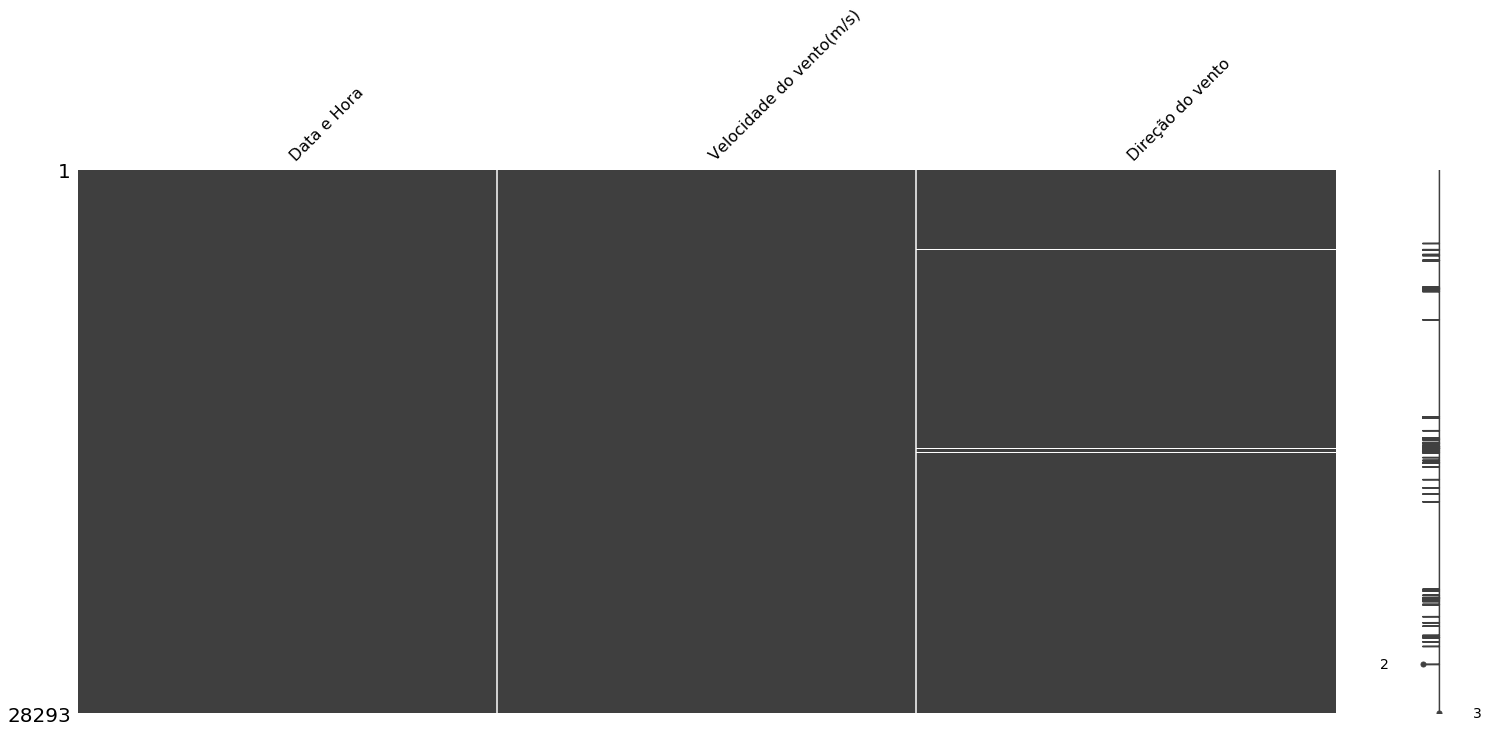

In [8]:
msno.matrix(df)

In [9]:
df[df.isnull().any(axis =1)].head()

,Data e Hora,Velocidade do vento(m/s),Direção do vento
3841,201512250500,0 000,NaN
4161,201601090200,0 000,NaN
4163,201601090400,0 000,NaN
4186,201601100300,0 000,NaN
4416,201601191700,0 000,NaN


In [10]:
df[df["Direção do vento"]==0]

,Data e Hora,Velocidade do vento(m/s),Direção do vento


In [11]:
df["Direção do vento"].value_counts()

90       5230
80       4732
100      3759
70       2724
110      2118
140      1478
120      1454
130      1310
150      1255
60        824
160       757
170       419
180       224
50        214
0 100     157
190       112
0 110      98
40         97
200        78
0 090      71
4 100      69
8 100      60
20         54
4 110      53
210        53
220        47
8 110      44
230        43
0 120      42
4 090      42
         ... 
2 100      23
0 080      22
280        20
2 110      19
4 120      18
290        17
8 090      17
300        14
310        13
340        12
6 110      11
4 080      11
330        11
8 120      10
320         9
0 130       8
2 090       8
8 080       6
6 090       5
6 100       4
0 140       3
4 130       2
6 120       2
2 120       2
2 080       1
0 150       1
0 060       1
0 190       1
2 130       1
4 260       1
Name: Direção do vento, Length: 69, dtype: int64

In [12]:
df["Velocidade do vento(m/s)"].value_counts()

5.140     2348
4.626     2287
5.654     2229
6.168     2113
4.112     2102
6.682     1929
3.598     1809
7.196     1805
3.084     1654
7.710     1560
2.570     1542
8.224     1283
2.056     1173
1.542      956
8.738      937
9.252      679
9.766      486
1.028      420
10.28      396
10.79      196
11.30      138
0 000      110
11.82       54
.514        31
-999        25
12.33       21
12.85        8
10.794       1
14.90        1
Name: Velocidade do vento(m/s), dtype: int64

In [13]:
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

Data e Hora | 0.0 | int64
Velocidade do vento(m/s) | 0.0 | object
Direção do vento | 0.0038878874633301525 | object


In [14]:
df["Direção do vento"].unique()

array(['120', '150', '140', '170', '130', '160', '110', '90', '100', '80',
       '70', '0 110', '4 110', '0 100', '180', '190', '8 120', '8 110',
       '4 100', '0 120', '2 110', '4 120', '8 100', '0 140', '6 120',
       '0 090', '6 110', '0 130', '4 090', '60', '2 100', '2 130',
       '0 060', '40', '50', '2 120', '8 090', '4 260', '0 080', nan, '30',
       '20', '350', '200', '210', '230', '220', '360', '10', '310', '340',
       '330', '-999', '270', '260', '240', '250', '300', '290', '280',
       '320', '6 090', '4 130', '0 190', '4 080', '2 080', '2 090',
       '8 080', '6 100', '0 150'], dtype=object)

In [15]:
df[df["Direção do vento"]==-999]

,Data e Hora,Velocidade do vento(m/s),Direção do vento


In [16]:
df["Velocidade do vento(m/s)"].unique()

array(['5.654', '7.196', '5.140', '8.224', '6.682', '4.626', '6.168',
       '7.710', '8.738', '10.794', '4.112', '3.084', '3.598', '9.252',
       '11.30', '9.766', '2.570', '10.28', '10.79', '11.82', '12.85',
       '12.33', '1.542', '1.028', '2.056', '0 000', '.514', '-999',
       '14.90'], dtype=object)

After making an exploratory analysis of the data, we see several errors in the data:
 * 1- In the direction of the wind there are values ​​with an incorrect format: 0 100, so when trying to pass it to whole, it will not allow it.
 * 2- In the same column, there are Nan values, this is obvious since when there is no wind, there is no direction. For the moment, since there are no 0 values, I will put them as such, but when it comes to studying the direction of the wind, I will not take it into account.
 * 3-In the speed of the veto we see 3 errors:
     * 0 000 You have to transform it to 0
     * .514 will have to put it as 0.514
     * -999 obviously the wind speed can not be negative so it will be eliminated.

# Removing the data with errors in wind direction

In [17]:
df1 = df.rename(columns={ #renombramos las columnas para que sean legibles
    "Data e Hora":"Data",
    "Velocidade do vento(m/s)":"Velocidade",
    "Direção do vento":"Direçao",
   
   
})
df1.head()

,Data,Velocidade,Direçao
0,201507170000,5.654,120
1,201507170100,7.196,150
2,201507170200,5.140,120
3,201507170300,8.224,140
4,201507170400,5.140,170


In [18]:
for i in range(len(df1["Direçao"])):
    if(str(df1["Direçao"][i]).find(" ") != -1):
        df1["Direçao"][i] = (int(df1["Direçao"][i].split(" ")[1]))
       

C:\Users\Crespo_sexy\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df["Direção do vento"].unique()

array(['120', '150', '140', '170', '130', '160', '110', '90', '100', '80',
       '70', '0 110', '4 110', '0 100', '180', '190', '8 120', '8 110',
       '4 100', '0 120', '2 110', '4 120', '8 100', '0 140', '6 120',
       '0 090', '6 110', '0 130', '4 090', '60', '2 100', '2 130',
       '0 060', '40', '50', '2 120', '8 090', '4 260', '0 080', nan, '30',
       '20', '350', '200', '210', '230', '220', '360', '10', '310', '340',
       '330', '-999', '270', '260', '240', '250', '300', '290', '280',
       '320', '6 090', '4 130', '0 190', '4 080', '2 080', '2 090',
       '8 080', '6 100', '0 150'], dtype=object)

In [18]:
df1["Direçao"]=pd.to_numeric(df1["Direçao"]).fillna(0).astype(np.int64)
df1["Direçao"].unique()


array([ 120,  150,  140,  170,  130,  160,  110,   90,  100,   80,   70,
        180,  190,   60,   40,   50,  260,    0,   30,   20,  350,  200,
        210,  230,  220,  360,   10,  310,  340,  330, -999,  270,  240,
        250,  300,  290,  280,  320], dtype=int64)

In [19]:
df1= df1[df1["Direçao"]>=0]
df1["Direçao"].unique()

array([120, 150, 140, 170, 130, 160, 110,  90, 100,  80,  70, 180, 190,
        60,  40,  50, 260,   0,  30,  20, 350, 200, 210, 230, 220, 360,
        10, 310, 340, 330, 270, 240, 250, 300, 290, 280, 320], dtype=int64)

In [20]:
df1.loc[df1.Velocidade.isin([
    "0 000"
]), "Velocidade"] = "0"
df1.Velocidade.unique()

array(['5.654', '7.196', '5.140', '8.224', '6.682', '4.626', '6.168',
       '7.710', '8.738', '10.794', '4.112', '3.084', '3.598', '9.252',
       '11.30', '9.766', '2.570', '10.28', '10.79', '11.82', '12.85',
       '12.33', '1.542', '1.028', '2.056', '0', '.514', '14.90'],
      dtype=object)

In [21]:
'.514'
df1.loc[df1.Velocidade.isin([
    ".514"
]), "Velocidade"] = "0.514"
df1.Velocidade.unique()

array(['5.654', '7.196', '5.140', '8.224', '6.682', '4.626', '6.168',
       '7.710', '8.738', '10.794', '4.112', '3.084', '3.598', '9.252',
       '11.30', '9.766', '2.570', '10.28', '10.79', '11.82', '12.85',
       '12.33', '1.542', '1.028', '2.056', '0', '0.514', '14.90'],
      dtype=object)

In [22]:
df1["Velocidade"]= pd.to_numeric(df1["Velocidade"])
df1.Velocidade.unique()


array([ 5.654,  7.196,  5.14 ,  8.224,  6.682,  4.626,  6.168,  7.71 ,
        8.738, 10.794,  4.112,  3.084,  3.598,  9.252, 11.3  ,  9.766,
        2.57 , 10.28 , 10.79 , 11.82 , 12.85 , 12.33 ,  1.542,  1.028,
        2.056,  0.   ,  0.514, 14.9  ])

In [23]:
df1.dtypes

Data            int64
Velocidade    float64
Direçao         int64
dtype: object

In [24]:
df1["Data"] = pd.to_datetime(df1["Data"], yearfirst=True, format='%Y%m%d%H%M')
df1.head()

,Data,Velocidade,Direçao
0,2015-07-17 00:00:00,5.654,120
1,2015-07-17 01:00:00,7.196,150
2,2015-07-17 02:00:00,5.140,120
3,2015-07-17 03:00:00,8.224,140
4,2015-07-17 04:00:00,5.140,170


# Text 1

In [19]:
filename2 ="../dataset/excel.datos.amanda.mod.por.ella/viento1.txt"

In [20]:
df2 = pd.read_csv(filename2, sep='\t', encoding = "ISO-8859-1",usecols= [0,2,1,4])
df2.head() 

,Unnamed: 0,Data e Hora,Velocidade do vento(m/s),Direção do vento
0,SBFZ,2008010100,100,"4,112"
1,SBFZ,2008010101,110,"5,14"
2,SBFZ,2008010102,110,"5,654"
3,SBFZ,2008010103,100,"4,112"
4,SBFZ,2008010104,100,"5,14"


In [21]:
del df2["Unnamed: 0"]
df2.head()

,Data e Hora,Velocidade do vento(m/s),Direção do vento
0,2008010100,100,"4,112"
1,2008010101,110,"5,14"
2,2008010102,110,"5,654"
3,2008010103,100,"4,112"
4,2008010104,100,"5,14"


In [24]:
df3 = df2.rename(columns={ #renombramos las columnas para que sean legibles
    "Data e Hora":"Data",
    "Direção do vento":"Velocidade",
    "Velocidade do vento(m/s)":"Direçao"
   
})
df3.head()

,Data,Direçao,Velocidade
0,2008010100,100,"4,112"
1,2008010101,110,"5,14"
2,2008010102,110,"5,654"
3,2008010103,100,"4,112"
4,2008010104,100,"5,14"


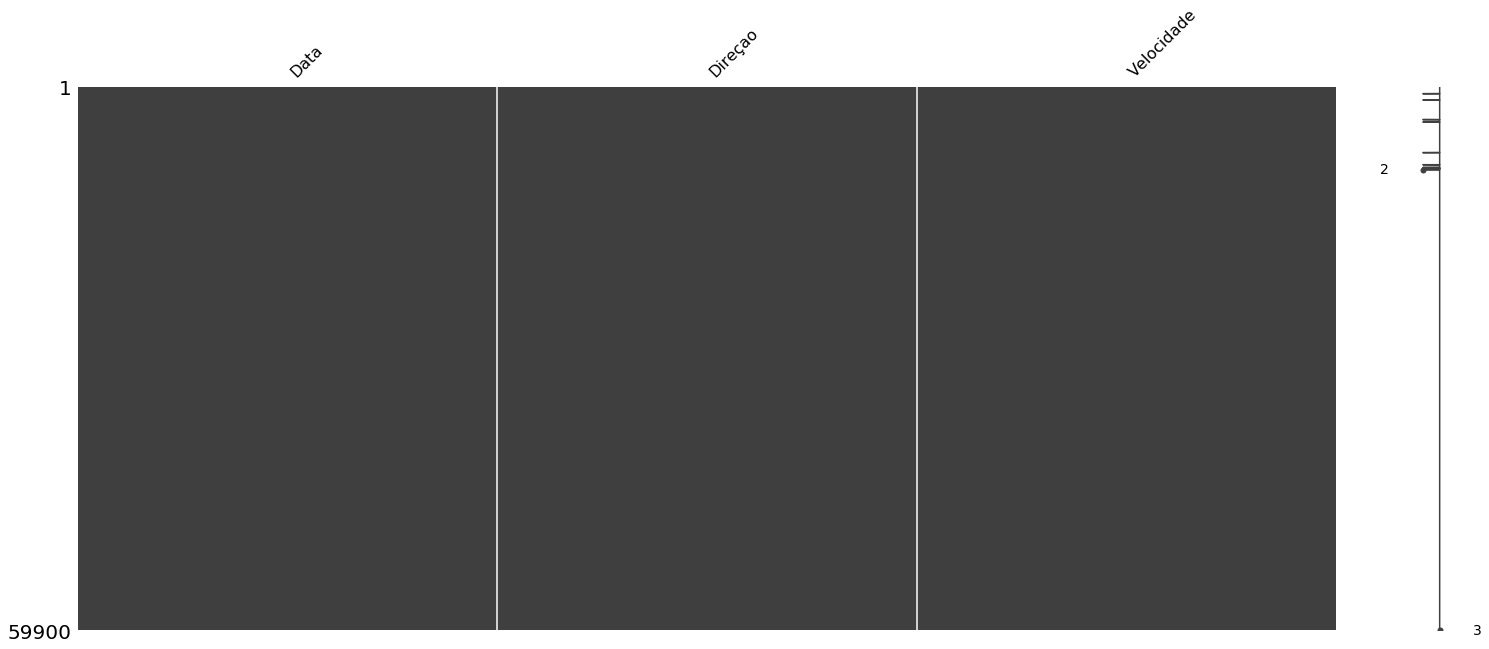

In [29]:
msno.matrix(df3)

In [30]:
df3[df3.isnull().any(axis =1)].head()

,Data,Direçao,Velocidade
770,2008020123,NaN,0
1469,2008030114,NaN,0
3624,2008052105,NaN,0
3625,2008052105,NaN,0
3626,2008052106,NaN,0


In [31]:
n_records = len(df3)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df3)

Data | 0.0 | object
Direçao | 0.0007011686143572621 | object
Velocidade | 0.0 | object


In [32]:
df3.dtypes

Data          object
Direçao       object
Velocidade    object
dtype: object

In [33]:
df3.Direçao.unique()

array(['100', '110', '120', '130', '150', '140', '80', '90', '190', '160',
       '180', '170', '200', '60', '50', '70', '40', '30', '20', '0',
       '240', '260', '250', '280', '220', '270', nan, '230', '210', '290',
       '330', '10', '310', '300', '320', '340', '350', '360', 'KT', '700',
       '116', 'CAV', '131', 'SBF', '317', '12', '14', '231', '9100',
       '121', '308', '91', 'RAN', '404', '405', '1220', '805', '117',
       '208', '42', '152', '11', '36', '31', '51', 'COR', '918', '191',
       '61', '122', '211', '311', '71', '81', '181', '201', '212', '251',
       '171', '151', '41', '999', '68', '6', 'VRB'], dtype=object)

In [34]:
df3.Velocidade.unique()

array(['4,112', '5,14', '5,654', '3,598', '6,168', '4,626', '7,71',
       '3,084', '2,57', '2,056', '6,682', '1,542', '7,196', '9,766',
       '8,224', '8,738', '9,252', '1,028', '0,514', '0', '#VALOR!',
       '11,308', '10,28', '10,794', '11,822', '13,878', '46,26', '30,84',
       '20,56', '41,12', '15,42', '12,336', '35,98', '25,7', '13,364',
       '12,85', '14,906', '16,962', '29,298', '14,392'], dtype=object)

As before we have problems in the data.
* Direção_ It seems that in addition to having null values, there are values ​​that have letters, they have an error in the reading of the data so I will proceed to eliminate them, others that go above 360, since it is in degrees, this is about a mistake. What I decide to do is eliminate the entire row of this data. As with the previous one, the null values ​​will be passed to 0 and then we will not take them into account.

* Speed: The first thing we can observe in speed is that it is separated by "," and not by "." so we'll have to change it first of all, so we have a #VALUE! that it will have to replace it with a nan and eliminate it.

In [35]:
df3[df3["Direçao"]== "KT"]

,Data,Direçao,Velocidade
2111,2008032607,KT,0


In [36]:
df4 = df3[(df3.Direçao != "KT") & (df3.Direçao != "SBF") & (df3.Direçao != "CAV") & (df3.Direçao != "9100") & 
          (df3.Direçao != "700") & (df3.Direçao != "RAN") & (df3.Direçao != "404") & (df3.Direçao != "405") &
          (df3.Direçao != "1220") & (df3.Direçao != "RAN") & (df3.Direçao != "805") &(df3.Direçao != "COR") &
          (df3.Direçao != "918") & (df3.Direçao != "999") & (df3.Direçao != "VRB")
          
         ]
df4.Direçao.unique()

array(['100', '110', '120', '130', '150', '140', '80', '90', '190', '160',
       '180', '170', '200', '60', '50', '70', '40', '30', '20', '0',
       '240', '260', '250', '280', '220', '270', nan, '230', '210', '290',
       '330', '10', '310', '300', '320', '340', '350', '360', '116',
       '131', '317', '12', '14', '231', '121', '308', '91', '117', '208',
       '42', '152', '11', '36', '31', '51', '191', '61', '122', '211',
       '311', '71', '81', '181', '201', '212', '251', '171', '151', '41',
       '68', '6'], dtype=object)

In [37]:
df4["Direçao"]=pd.to_numeric(df4["Direçao"]).fillna(0).astype(np.int64)
df4["Direçao"].unique()

C:\Users\Crespo_sexy\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([100, 110, 120, 130, 150, 140,  80,  90, 190, 160, 180, 170, 200,
        60,  50,  70,  40,  30,  20,   0, 240, 260, 250, 280, 220, 270,
       230, 210, 290, 330,  10, 310, 300, 320, 340, 350, 360, 116, 131,
       317,  12,  14, 231, 121, 308,  91, 117, 208,  42, 152,  11,  36,
        31,  51, 191,  61, 122, 211, 311,  71,  81, 181, 201, 212, 251,
       171, 151,  41,  68,   6], dtype=int64)

In [38]:
df4['Velocidade'] = [x.replace(',', '.') for x in df4['Velocidade']]

df4.head()

C:\Users\Crespo_sexy\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Data,Direçao,Velocidade
0,2008010100,100,4.112
1,2008010101,110,5.14
2,2008010102,110,5.654
3,2008010103,100,4.112
4,2008010104,100,5.14


In [39]:
df4 = df4[df4["Velocidade"]!="#VALOR!"]
df4.Velocidade.unique()

array(['4.112', '5.14', '5.654', '3.598', '6.168', '4.626', '7.71',
       '3.084', '2.57', '2.056', '6.682', '1.542', '7.196', '9.766',
       '8.224', '8.738', '9.252', '1.028', '0.514', '0', '11.308',
       '10.28', '10.794', '11.822', '13.878', '46.26', '20.56', '41.12',
       '15.42', '12.336', '35.98', '25.7', '30.84', '13.364', '12.85',
       '14.906', '16.962', '29.298', '14.392'], dtype=object)

In [40]:
df4["Velocidade"]= pd.to_numeric(df4["Velocidade"])

In [41]:
df4["Data"] = pd.to_datetime(df4["Data"], yearfirst=True, format='%Y%m%d%H')
df4.dtypes

Data          datetime64[ns]
Direçao                int64
Velocidade           float64
dtype: object

In [42]:
df4.head()

,Data,Direçao,Velocidade
0,2008-01-01 00:00:00,100,4.112
1,2008-01-01 01:00:00,110,5.140
2,2008-01-01 02:00:00,110,5.654
3,2008-01-01 03:00:00,100,4.112
4,2008-01-01 04:00:00,100,5.140


# Joining the two files

In [43]:
df1.shape

(28268, 3)

In [44]:
df1.head()

,Data,Velocidade,Direçao
0,2015-07-17 00:00:00,5.654,120
1,2015-07-17 01:00:00,7.196,150
2,2015-07-17 02:00:00,5.140,120
3,2015-07-17 03:00:00,8.224,140
4,2015-07-17 04:00:00,5.140,170


In [45]:
df4.shape

(59845, 3)

In [46]:
df4= df4[['Data',"Velocidade","Direçao",]]

In [47]:
df4.head()

,Data,Velocidade,Direçao
0,2008-01-01 00:00:00,4.112,100
1,2008-01-01 01:00:00,5.140,110
2,2008-01-01 02:00:00,5.654,110
3,2008-01-01 03:00:00,4.112,100
4,2008-01-01 04:00:00,5.140,100


In [48]:
Totaldata = pd.concat([df4, df1], axis = 0,ignore_index = True)
Totaldata.shape

(88113, 3)

In [49]:
Totaldata.tail()

,Data,Velocidade,Direçao
88108,2018-10-22 18:00:00,6.682,70
88109,2018-10-22 19:00:00,5.654,70
88110,2018-10-22 20:00:00,3.598,70
88111,2018-10-22 21:00:00,4.112,60
88112,2018-10-22 22:00:00,4.112,70


In [50]:
Totaldata.to_pickle("dataset/excel.datos.amanda.mod.por.ella/Totaldata.pkl")